In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn import metrics, tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from IPython.display import Image
import pydotplus

In [3]:
housing_data = pd.read_csv('C:/Users/kalam/OneDrive - Adobe/Personal/Data Sceince/dataset for students.csv')

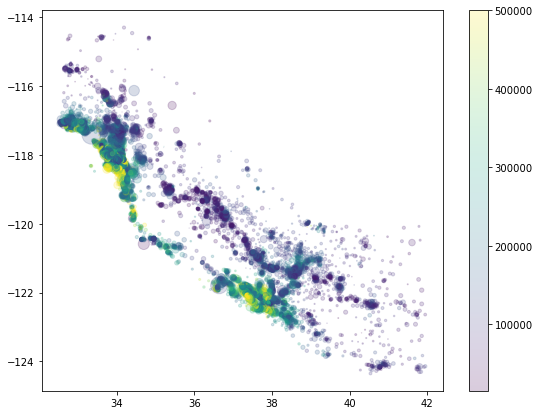

In [4]:
plt.figure(figsize = (9, 7))
plt.scatter(housing_data.latitude, housing_data.longitude, alpha = 0.2, c = housing_data.median_house_value, s = housing_data.population/100)
plt.colorbar()

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

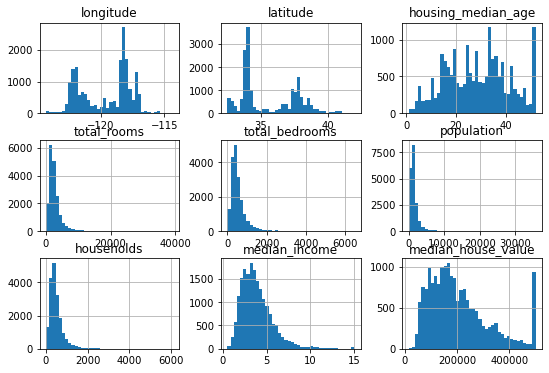

In [5]:
housing_data.hist(bins = 40, figsize = (9,6))

In [6]:
housing_one_hot_encoded_data = pd.get_dummies(housing_data, columns = ['ocean_proximity'])
housing_data_prepared = housing_one_hot_encoded_data.drop(columns =['latitude','longitude'])


y = housing_data['median_house_value']
X = housing_data_prepared.drop(columns =['median_house_value'])
X['total_bedrooms'].fillna(X.total_bedrooms.median(), inplace = True)

X[1:5]

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
1,21,7099,1106.0,2401,1138,8.3014,0,0,0,1,0
2,52,1627,280.0,565,259,3.8462,0,0,0,1,0
3,52,919,213.0,413,193,4.0368,0,0,0,1,0
4,52,2535,489.0,1094,514,3.6591,0,0,0,1,0


In [7]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.20, random_state= 15)
clf = DecisionTreeClassifier(criterion="gini")

clf.fit(x_train, y_train)
clf.score(x_train,y_train)

1.0

In [8]:
y_pred = clf.predict(x_test)

In [9]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  1],
       [ 0,  0,  0, ...,  0,  1, 87]], dtype=int64)

In [10]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred, average = 'micro')
precision

0.025855103689738757

In [12]:
train = x_train.join(y_train)
correlation_matrix = train.corr()
correlation_matrix['median_house_value'].sort_values(ascending = False)

median_house_value            1.000000
median_income                 0.685824
ocean_proximity_<1H OCEAN     0.250445
ocean_proximity_NEAR BAY      0.158532
ocean_proximity_NEAR OCEAN    0.150124
total_rooms                   0.137787
housing_median_age            0.103896
households                    0.067209
total_bedrooms                0.051790
ocean_proximity_ISLAND        0.027424
population                   -0.022881
ocean_proximity_INLAND       -0.484645
Name: median_house_value, dtype: float64

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

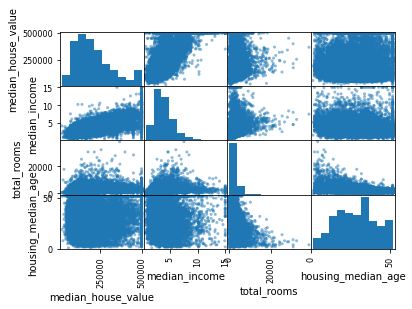

In [14]:
from pandas.plotting import scatter_matrix
housing_cols = train[['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']]
scatter_matrix(housing_cols)